In [10]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np 
import acquire
import prepare

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Set figure size and figure size for all plots
plt.rc("figure", figsize = (14,14))
plt.rc("font", size=14)

# Allow all columns to be displayed
pd.set_option('display.max_columns', None)

In [2]:
df = acquire.acquire_data()
df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


In [3]:
column_list= ['h1n1_concern','h1n1_knowledge', 
       'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective',
       'opinion_seas_risk',
       'opinion_seas_sick_from_vacc',
       'household_adults',
       'household_children']

In [4]:
h1n1_train, h1n1_test, seasonal_train, seasonal_test = prepare.prepare_data(df, column_list)

                         column n_nans  percentage_nans
36             seasonal_vaccine      0         0.000000
30                   census_msa      0         0.000000
29               hhs_geo_region      0         0.000000
24                          sex      0         0.000000
23                         race      0         0.000000
21                    age_group      0         0.000000
35                 h1n1_vaccine      0         0.000000
4          behavioral_face_mask     19         0.071142
5         behavioral_wash_hands     42         0.157262
2     behavioral_antiviral_meds     71         0.265848
7       behavioral_outside_home     82         0.307036
6   behavioral_large_gatherings     87         0.325757
0                  h1n1_concern     92         0.344479
1                h1n1_knowledge    116         0.434343
8         behavioral_touch_face    128         0.479275
3          behavioral_avoidance    208         0.778822
32           household_children    249         0

# Explore

In this notebook I will:
- Establish my initial hypothesis
- Explore both sets of data to determine which features have the most influence on vaccination status for the respective vaccines
- Visualize any interesting relationships
- Perform hypothesis testing to determine strength and validity of relationships

_**All visualizations will be accompanied by explanations and key takeaways**_

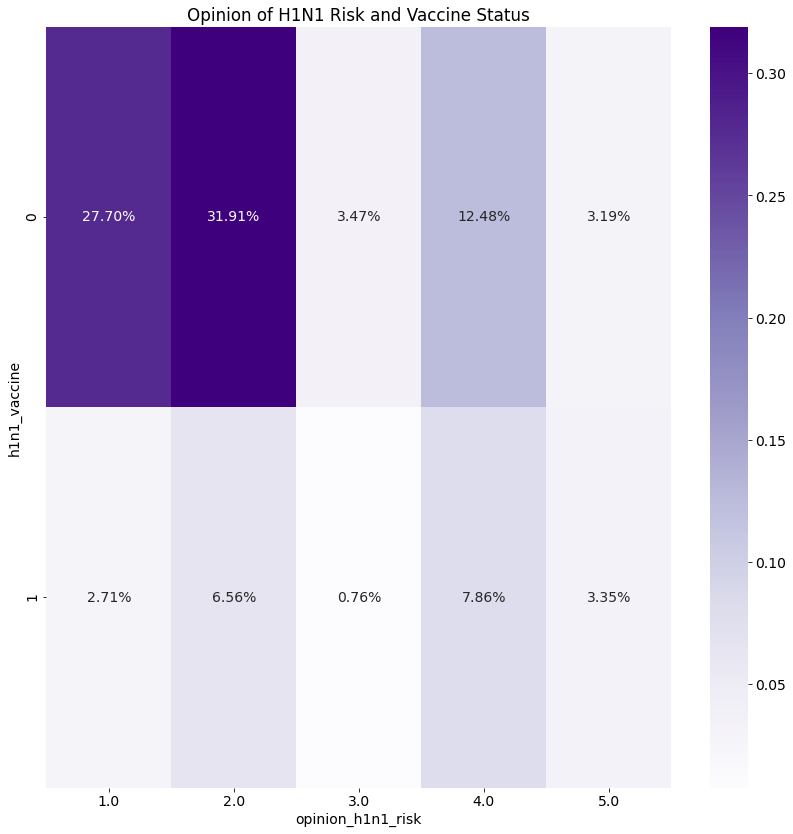

In [11]:
plt.title('Opinion of H1N1 Risk and Vaccine Status')
ctab = pd.crosstab(h1n1_train.h1n1_vaccine, h1n1_train.opinion_h1n1_risk, normalize=True)
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.2%')

### Key Takeaway^^

Based on this quick crosstab, it looks like people who have a low opion of their risk of getting sick with h1n1 is in some way related to their vaccine status

In [12]:
#Create a function that takes in the h1n1 training set and returns a heatma
def opinion_h1n1_status(h1n1_train):
    plt.title('Opinion of H1N1 Risk and Vaccine Status')
    ctab = pd.crosstab(h1n1_train.h1n1_vaccine, h1n1_train.opinion_h1n1_risk, normalize=True)
    sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.2%')